## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 確認硬體資源
"""
Your code here
"""
!nvidia-sim

/bin/sh: nvidia-sim: command not found


In [1]:
import os
from keras.datasets import cifar10
from keras.models import Model
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Input, Dropout
from keras.utils import to_categorical
from keras.optimizers import Adam

# Try to enable GPU (optional)


Using TensorFlow backend.


In [2]:
train, test = cifar10.load_data()

In [3]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=False):
    x = x / 255.
    if flatten == True:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y):
    y = to_categorical(y, num_classes=10)
    return y

In [4]:
x_train, y_train = train
x_test, y_test = test

img_shape = x_train.shape[1:]

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
"""
Your code here
"""
def build_cnn(x_shape):
    input_layer = Input(shape=(x_shape))
    
    con_layer = Conv2D(filters=32, kernel_size=(3, 3), padding='same')(input_layer)
    maxpool_layer = MaxPool2D()(con_layer)
    
    con_layer = Conv2D(filters=32, kernel_size=(3, 3), padding='same')(maxpool_layer)
    maxpool_layer = MaxPool2D()(con_layer)
    flatten_layer = Flatten()(maxpool_layer)
    
    fully_conn_layer = Dense(512, activation='relu')(flatten_layer)
    fully_conn_layer = Dense(256, activation='relu')(fully_conn_layer)
    output = Dense(10, activation='softmax')(fully_conn_layer)
    
    model = Model(inputs=[input_layer], outputs=[output])
    
    return model
    
model = build_cnn(img_shape)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1049088   
__________

In [6]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 10
BATCH_SIZE = 256

In [7]:
optimizer = Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [8]:
history = model.fit(x_train, y_train, 
                      epochs=EPOCHS, 
                      batch_size=BATCH_SIZE, 
                      validation_data=(x_test, y_test), 
                      shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 36s 718us/step - loss: 1.5188 - acc: 0.4559 - val_loss: 1.2063 - val_acc: 0.5686
Epoch 2/10
50000/50000 [==============================] - 36s 711us/step - loss: 1.1177 - acc: 0.6057 - val_loss: 1.0849 - val_acc: 0.6263
Epoch 3/10
50000/50000 [==============================] - 35s 694us/step - loss: 0.9242 - acc: 0.6751 - val_loss: 0.9483 - val_acc: 0.6659
Epoch 4/10
50000/50000 [==============================] - 35s 702us/step - loss: 0.7807 - acc: 0.7271 - val_loss: 0.9585 - val_acc: 0.6723
Epoch 5/10
50000/50000 [==============================] - 34s 678us/step - loss: 0.6508 - acc: 0.7741 - val_loss: 0.8952 - val_acc: 0.6922
Epoch 6/10
50000/50000 [==============================] - 34s 676us/step - loss: 0.5198 - acc: 0.8207 - val_loss: 0.9421 - val_acc: 0.6952
Epoch 7/10
50000/50000 [==============================] - 33s 654us/step - loss: 0.4031 - acc: 0.8631 - val_loss: 1.

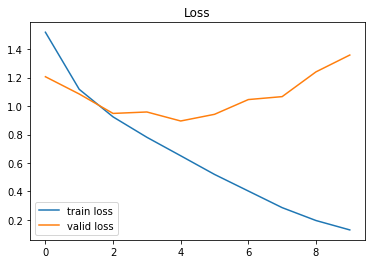

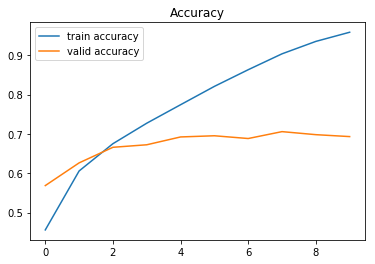

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()